<a href="https://colab.research.google.com/github/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 2.0

### WEEK 2 Exercises

### Exercises:
Please, see week 2 exercises from [**Learn PyTorch for Deep Learning**: 01. Pytorch Workflows](https://www.learnpytorch.io/01_pytorch_workflow/#exercises)

**Arewa Data Science Academy**

**Deep Learning Cohort 1.0**

**Name: Abdulrahman Abdullahi Garba**

**Email: abdulrahmanabdullahigarba@gmail.com**

**Title: Week 2 Solution**

### Additional Exercise
[Click to view PDF 📄](ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [19]:
# Create a straight line using weight * X + bias
weight, bias = 0.3, 0.9
start, end, step = 0, 1, 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [20]:
# Train_test_split
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [28]:
# Plot the training and testing data so it becomes visual
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  # set the figure size
  plt.figure(figsize=(8, 5))
  #Plot training and test data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

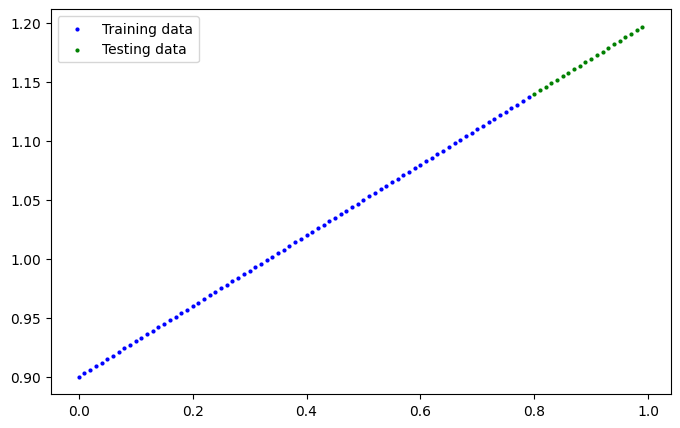

In [29]:
plot_predictions()

In [30]:
# Building the Model
# First, we will subclass nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=float), requires_grad=True)

  # Define the Forward Function
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [31]:
pytorch_model = LinearRegressionModel()
pytorch_model.state_dict()

OrderedDict([('weights', tensor([0.4617])),
             ('bias', tensor([0.2674], dtype=torch.float64))])

In [32]:
# Creating the Loss Function and Optimizer
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=pytorch_model.parameters(), lr=0.01)

In [33]:
#Num of Epochs
epochs = 300

train_loss_values = []
test_loss_values = []
epochs_count = []

for epoch in range(epochs):
  #Training
  pytorch_model.train()

  #Forward Pass
  y_pred = pytorch_model(X_train)
  #print(y_pred)
  #Calculate the loss
  loss = loss_func(y_pred, y_train)
  #Optimze the function using zero_grad()
  optimizer.zero_grad()
  #Perform backpropagation on the loss
  loss.backward()
  #Update the optimizer
  optimizer.step()

  #Testing, first we put the model on evaluation mode
  pytorch_model.eval()

  with torch.inference_mode():
    #Apply forward pass
    test_pred = pytorch_model(X_test)
    #Calculate the loss
    test_loss = loss_func(test_pred, y_test.type(torch.float))

    #Operations
    if epoch % 20 == 0:
      epochs_count.append(epoch)
      train_loss_values.append(loss.detach().cpu().numpy())
      test_loss_values.append(test_loss.detach().cpu().numpy())
      print(f"Epoch {epoch} | MAE Train Loss {loss} | MAE Test Loss {test_loss}")

Epoch 0 | MAE Train Loss 0.5687945086166258 | MAE Test Loss 0.47443065239763776
Epoch 20 | MAE Train Loss 0.33758950979746816 | MAE Test Loss 0.20372565730190778
Epoch 40 | MAE Train Loss 0.10896926289071032 | MAE Test Loss 0.06317872892045476
Epoch 60 | MAE Train Loss 0.06621249217532217 | MAE Test Loss 0.13756586818122374
Epoch 80 | MAE Train Loss 0.058621234728788184 | MAE Test Loss 0.13479196242713395
Epoch 100 | MAE Train Loss 0.05176721103565873 | MAE Test Loss 0.11949668280505658
Epoch 120 | MAE Train Loss 0.04491318664403733 | MAE Test Loss 0.10420139871263086
Epoch 140 | MAE Train Loss 0.038059127514083906 | MAE Test Loss 0.08890590302371618
Epoch 160 | MAE Train Loss 0.031206961593796507 | MAE Test Loss 0.07292214755439437
Epoch 180 | MAE Train Loss 0.024355775823417185 | MAE Test Loss 0.0565944253625843
Epoch 200 | MAE Train Loss 0.017503610552145204 | MAE Test Loss 0.040610671383378615
Epoch 220 | MAE Train Loss 0.010652424642067334 | MAE Test Loss 0.024282944721219744
Epoc

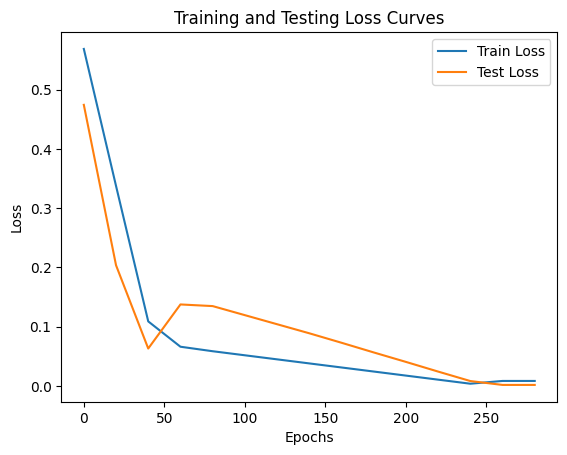

In [34]:
#Plotting the Loss curves
plt.title("Training and Testing Loss Curves")
plt.plot(epochs_count, train_loss_values, label="Train Loss")
plt.plot(epochs_count, test_loss_values, label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [40]:
#Make Predictions with trained model
pytorch_model.eval()
with torch.inference_mode():
  y_preds = pytorch_model(X_test)
y_preds

tensor([[1.1511],
        [1.1542],
        [1.1573],
        [1.1603],
        [1.1634],
        [1.1665],
        [1.1695],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1818],
        [1.1849],
        [1.1879],
        [1.1910],
        [1.1941],
        [1.1971],
        [1.2002],
        [1.2033],
        [1.2063],
        [1.2094]], dtype=torch.float64)

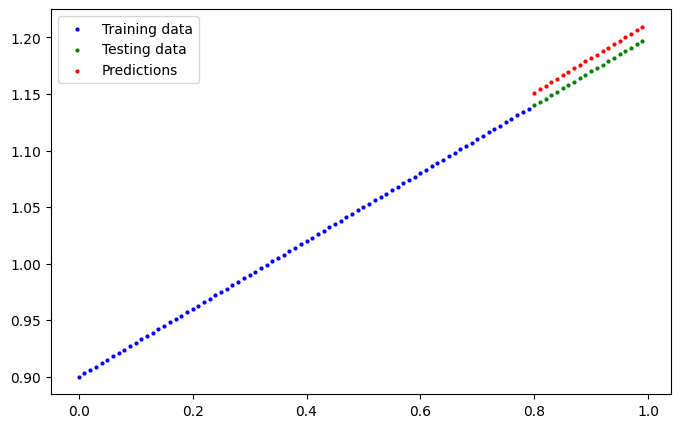

In [41]:
plot_predictions(predictions=y_preds)

In [43]:
from pathlib import Path
#Saving model
# Create models directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# Create model save path
model_name = "01_pytorch_workflow_pytorch_model.pth"
model_save_path = model_path / model_name

# Save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=pytorch_model.state_dict(), f=model_save_path)

Saving model to: models/01_pytorch_workflow_pytorch_model.pth


In [44]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_pytorch_model.pth

-rw-r--r-- 1 root root 1780 Feb  7 08:38 models/01_pytorch_workflow_pytorch_model.pth


In [45]:
#Loading the saved model
#Instance instantiation
loaded_pytorch_model = LinearRegressionModel()

#Loading the state_dict()
loaded_pytorch_model.load_state_dict(torch.load(f=model_save_path))

<ipython-input-45-8d3ef4f4c5fc>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_pytorch_model.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [46]:
#Performing predictions with the loaded model
loaded_pytorch_model.eval()
with torch.inference_mode():
  loaded_pytorch_preds = loaded_pytorch_model(X_test)

#Comparing the results with the original model prediction
y_preds == loaded_pytorch_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)